# Initialization:

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Reading the data:

Data source: Baby names recorded in Social Security Card Applications from 1910 to 2016. 

https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of-

Read the data files and stack the state data on top of each other:

In [9]:
path="C:/Users/Abin/Desktop/state/"
data = pd.DataFrame()

for state in [x[:2] for x in os.listdir(path) if len(x)==6]:
    state_data = pd.read_csv(path +state + ".TXT",header=None,names=["State", "Gender", "Year", "Name", "Count"])
    data = pd.concat([data, state_data])

data = data[["Name", "Year", "Gender", "State", "Count"]]
data.sample(5)

,Name,Year,Gender,State,Count
129366,Marvin,2015,M,AL,6
26387,Wesley,1954,M,NH,7
14653,Dona,1950,F,KS,6
73824,Dillon,1979,M,IA,6
103032,Willard,1918,M,MI,89


# Analysis:

Create a summary by summing over all states for a specific name for each year:

In [10]:
data_sum=data.pivot_table(values='Count', index='Year' , columns='Name', aggfunc=sum).fillna(0).reset_index().rename_axis(None, axis=1).rename_axis(None, axis=0).set_index('Year')
data_sum.sample(5)

,Aaban,Aadan,Aadarsh,Aaden,Aadhav,Aadhya,Aadi,Aadil,Aadin,Aadit,...,Zyonna,Zyquan,Zyquavious,Zyra,Zyrah,Zyren,Zyria,Zyriah,Zyron,Zyshonne
Year,,,,,,,,,,,,,,,,,,,,,
1939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,6.0,0.0,0.0,154.0,0.0,135.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,6.0,6.0,0.0,7.0,0.0,0.0


Query data for years after 2000 to be used in finding 'Hot' names. i.e., names that are increasing in time: 

In [11]:
new_data_sum=data_sum[data_sum.index>2000]

Use linear regression on the new data summary to find the trend (decreasing, stable, increasing) of each name:

In [12]:
regr = linear_model.LinearRegression()
X=new_data_sum.index.values.astype(float).reshape(-1, 1)
regr.fit(X, new_data_sum.values)
line_y = regr.predict(X)
predicted=pd.DataFrame(line_y, index=new_data_sum.index,columns=new_data_sum.columns) 

Plot the babies born in each year with a specific name along with the regression line:

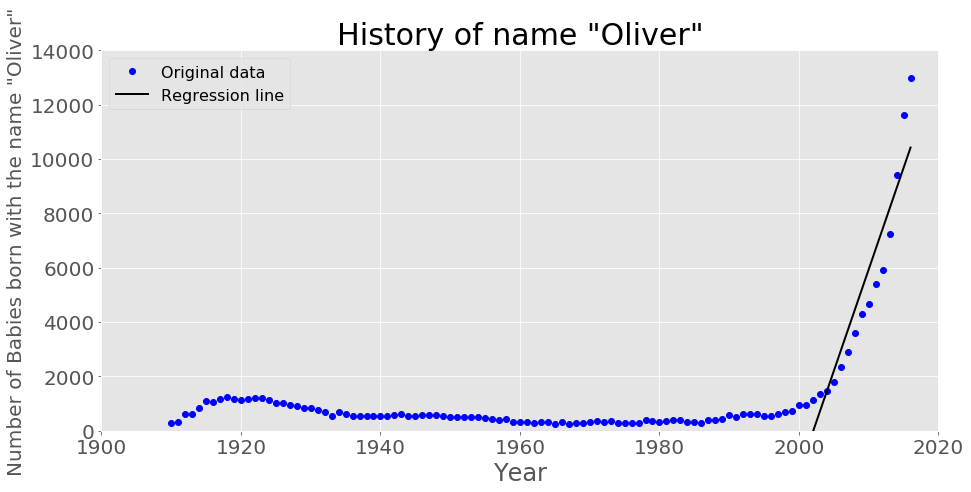

In [19]:
plt.figure(figsize=(15,7))
_ = plt.plot(data_sum.index.values, data_sum['Oliver'], 'o', label='Original data', color='blue')
plt.plot(X, predicted['Oliver'], color='black', linewidth=2, label='Regression line')
plt.ylabel('Number of Babies born with the name "Oliver"', fontsize=20)
plt.xlabel('Year', fontsize=24)
plt.title('History of name "Oliver"', fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axis([1900, 2020, 0, 14000])
plt.legend(loc=2, fontsize=16)
plt.show()

 If the slope of the regression line is significantly greater than zero, it means that the name is Hot. Hence, "Oliver" is classified as a Hot name